In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
pip install openpyxl==3.0.9

TRAINING DATA

In [5]:
dataxtr = pd.read_csv('/content/drive/MyDrive/xtr.csv',header=None)
dataytr = pd.read_csv('/content/drive/MyDrive/ytr.csv',header=None)

TESTING DATA

In [6]:
dataxte = pd.read_csv('/content/drive/MyDrive/xte.csv',header=None)
datayte = pd.read_csv('/content/drive/MyDrive/yte.csv',header=None)


In [7]:
X=dataxtr.values
Y=dataytr.values
Xte=dataxte.values
Yte=datayte.values
Yte1=Yte[:,0].reshape(Yte.shape[0],1)
k=Xte.shape[0]

In [8]:
datan_x=dataxtr.values
X1=datan_x[:,0].reshape(datan_x.shape[0],1)
X2=datan_x[:,1].reshape(datan_x.shape[0],1)
m=X1.shape[0]
# print(m)
# print(X1)

In [9]:
x1min=np.min(X1,axis=0)
x1max=np.max(X1,axis=0)
X1= (X1-x1min)/(x1max-x1min)

In [10]:
n=X2.shape[0]
x2min=np.min(X2,axis=0)
x2max=np.max(X2,axis=0)
X2= (X2-x2min)/(x2max-x2min)
# print(X1)
# print(X2)

In [11]:
datan_y=dataytr.values
y=datan_y

ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin)


In [12]:
# print(ztr.shape)

**Making the Z matrix**

for training data

In [13]:
ztr=np.ones([m,1])
ztr=np.append(ztr,X1,axis=1)
ztr=np.append(ztr,X2,axis=1)
ztr=np.append(ztr,X1**2,axis=1)
ztr=np.append(ztr,X2**2,axis=1)
ztr=np.append(ztr,X1*X2,axis=1)
print(ztr)

[[1.00000000e+00 5.13227513e-01 7.29927007e-02 2.63402480e-01
  5.32793436e-03 3.74618623e-02]
 [1.00000000e+00 5.13227513e-01 7.44525547e-01 2.63402480e-01
  5.54318291e-01 3.82110995e-01]
 [1.00000000e+00 5.13227513e-01 6.20437956e-01 2.63402480e-01
  3.84943257e-01 3.18425829e-01]
 [1.00000000e+00 5.13227513e-01 0.00000000e+00 2.63402480e-01
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.13227513e-01 6.35036496e-01 2.63402480e-01
  4.03271352e-01 3.25918202e-01]
 [1.00000000e+00 5.13227513e-01 2.91970803e-02 2.63402480e-01
  8.52469498e-04 1.49847449e-02]
 [1.00000000e+00 5.13227513e-01 5.76642336e-01 2.63402480e-01
  3.32516383e-01 2.95948712e-01]
 [1.00000000e+00 5.13227513e-01 6.42335766e-01 2.63402480e-01
  4.12595237e-01 3.29664388e-01]
 [1.00000000e+00 5.13227513e-01 1.16788321e-01 2.63402480e-01
  1.36395120e-02 5.99389796e-02]
 [1.00000000e+00 5.13227513e-01 6.49635036e-01 2.63402480e-01
  4.22025681e-01 3.33410574e-01]
 [1.00000000e+00 5.13227513e-01 6.20437956e-01 2.6

for testing data

In [14]:
zte=np.ones([m,1])
zte=np.append(zte,X1,axis=1)
zte=np.append(zte,X2,axis=1)
zte=np.append(zte,X1**2,axis=1)
zte=np.append(zte,X2**2,axis=1)
zte=np.append(zte,X1*X2,axis=1)
# print(zte)

In [15]:
def cost_function(X,y,w):

    hypothesis = np.dot(X,w.T)
    J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)
#     J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(w**2)
    return J

In [16]:
def batch_gradient_descent(X,y,w,alpha,iters):
    cost_history = np.zeros(iters)
    for i in range(iters):
        hypothesis = np.dot(X,w.T)
        w = w - (alpha/len(y)) * np.dot(hypothesis - y, X)
        cost_history[i] = cost_function(X,y,w)
    return w, cost_history

In [17]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-1)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        cost_history[i] = cost_function(ind_x,ind_y,w)
    return w, cost_history

In [18]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-batch_size)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        
        # print((ind_x.T@(ind_x@w - ind_y)).sum(axis=1).shape)
        w = w - (alpha/batch_size) * (ind_x.T@(ind_x@w - ind_y)).sum(axis=1)
        cost_history[i] = cost_function(ind_x,ind_y,w)
    return w, cost_history

In [19]:
def cost_function_l1(X,y,w,lamb):
  
    hypothesis = np.dot(X,np.transpose(w))
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(abs(w))
    return J

In [20]:
def batch_gradient_descent_l1(X,y,w,alpha,iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        hypothesis = np.dot(X,w.T)
        w = w - (alpha/len(y)) * (np.dot(hypothesis - y, X) - (lamb/2)*np.sign(w))
        cost_history[i] = cost_function_l1(X,y,w,lamb)
    return w, cost_history

In [21]:
def cost_function_l1_mbg(X,y,w,lamb):
    w=w.ravel()
    hypothesis = np.dot(X,np.transpose(w))
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(abs(w))
    return J

In [22]:
def MB_gradient_descent_l1(X,y,w,alpha, iters, batch_size,lamb):
    cost_history = np.zeros(iters)
    
    w= np.zeros(((X.shape[1]),1))

    for i in range(iters):
        
        rand_index = np.random.randint(len(y)-batch_size)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y) - (lamb/2)*np.sign(w))
        cost_history[i] = cost_function_l1_mbg(ind_x,ind_y,w,lamb)
    return w, cost_history

In [23]:
def cost_function_l2(X,y,w,lamb):

    hypothesis = np.dot(X,w.T)
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(w**2)
    return J

In [24]:
def cost_function_mbg(X,y,w):
    w=w.ravel()
    hypothesis = np.dot(X,w.T)
    J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)
    return J

In [25]:
def cost_function_l2_mbg(X,y,w,lamb):
    w=w.ravel()#flatten the array into one dimensional array
    hypothesis = np.dot(X,w.T)
    #J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(w**2)
    return J

In [26]:
def batch_gradient_descent_l2(X,y,w,alpha,iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        hypothesis = np.dot(X,w.T)
        w = (w*(1-alpha*lamb)) - (alpha/len(y)) * (np.dot(hypothesis - y, X))
        cost_history[i] = cost_function_l2(X,y,w,lamb)
    return w, cost_history

In [27]:
def stochastic_gradient_descent_l1(X,y,w,alpha, iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-1)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y) - (lamb/2)*np.sign(w))
        cost_history[i] = cost_function_l1(ind_x,ind_y,w,lamb)
    return w, cost_history

In [28]:
def stochastic_gradient_descent_l2(X,y,w,alpha, iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-1)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w*(1-alpha*lamb) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        cost_history[i] = cost_function_l2(ind_x,ind_y,w,lamb)
    return w, cost_history

In [29]:
def MB_gradient_descent_l2(X,y,w,alpha, iters, batch_size,lamb):
    cost_history = np.zeros(iters)
    w= np.zeros(((X.shape[1]),1))
    for i in range(iters):
        rand_index = np.random.randint(len(y)-batch_size)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        
        w = w*((1-(alpha*lamb))) - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y)).sum(axis=1)
        cost_history[i] = cost_function_l2_mbg(ind_x,ind_y,w,lamb)
    return w, cost_history

**Weight initialization**

In [30]:
w= np.zeros((ztr.shape[1]))
w1= np.zeros((ztr.shape[1]))
print(w.shape)

(6,)


**Batch Gradient Descent**

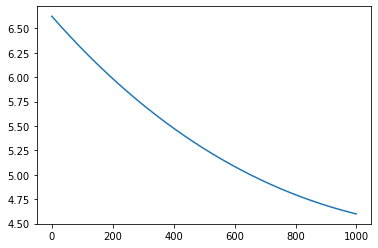

In [31]:
alpha=0.0002#learning rate
iters=1000 ###iterations
lamb=0.2
batch_w,J_his = batch_gradient_descent(ztr,y,w,alpha,iters)

plt.plot(range(iters),J_his)
plt.show()

In [32]:
# print(batch_w)

In [33]:
bgd=batch_w[-1:]
print(bgd)

[[0.12040141 0.06170125 0.06961951 0.04162253 0.04871827 0.04190613]]


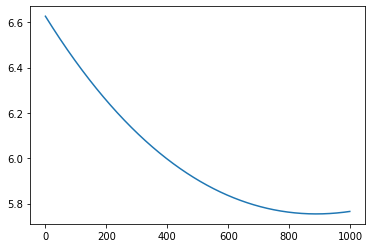

In [34]:
alpha=0.0002#learning rate
iters=1000 ###iterations
lamb=0.2
batch_w_l1,J_his_l1 = batch_gradient_descent_l1(ztr,y,w,alpha,iters,lamb)

plt.plot(range(iters),J_his_l1)
plt.show()

In [35]:
print(batch_w_l1)

[[ 0.03322797  0.01730444  0.01931353  0.01180157  0.01367408  0.0118069 ]
 [ 0.02804292  0.01471878  0.01627816  0.01006477  0.0115858   0.01000649]
 [ 0.02919655  0.01529409  0.01695352  0.01045121  0.01205044  0.01040708]
 [ 0.03363514  0.01750747  0.01955188  0.01193794  0.01383805  0.01194827]
 [ 0.02906543  0.01522871  0.01687676  0.01040729  0.01199763  0.01036155]
 [ 0.03347595  0.01742809  0.0194587   0.01188463  0.01377394  0.011893  ]
 [-0.01400077 -0.00716497 -0.0083481  -0.0049323  -0.00585696 -0.0050999 ]
 [ 0.02899941  0.01519578  0.01683811  0.01038517  0.01197104  0.01033863]
 [ 0.03296895  0.01717528  0.0191619   0.01171482  0.01356976  0.01171696]
 [ 0.02893308  0.0151627   0.01679928  0.01036296  0.01194433  0.0103156 ]
 [ 0.02919655  0.01529409  0.01695352  0.01045121  0.01205044  0.01040708]
 [ 0.02543449  0.01341738  0.01475076  0.00919038  0.01053468  0.00910018]
 [ 0.0268821   0.0141386   0.01559777  0.00967462  0.01111711  0.00960223]
 [ 0.03372022  0.01755049

In [36]:
bgd_l1=batch_w_l1[-1:]
print(bgd_l1)

[[0.12072715 0.06204622 0.06996186 0.04197366 0.04906718 0.04225723]]


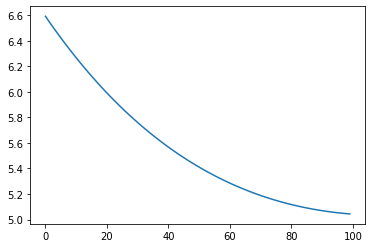

In [37]:
alpha=0.002 ##learning rate
iters=100 ###iterations
lamb=1
batch_w_l2,J_his_l2 = batch_gradient_descent_l2(ztr,y,w,alpha,iters,lamb)

plt.plot(range(iters),J_his_l2)
plt.show()

In [38]:
print(batch_w_l2)

[[ 0.03019495  0.01555516  0.01741088  0.01050073  0.01222506  0.01050986]
 [ 0.02570683  0.0133155   0.01478163  0.00899582  0.01041567  0.00894951]
 [ 0.02670512  0.01381368  0.01536647  0.00933057  0.01081815  0.0092966 ]
 [ 0.03054761  0.01573114  0.01761747  0.01061897  0.01236723  0.01063246]
 [ 0.02659165  0.01375706  0.01529999  0.00929252  0.0107724   0.00925714]
 [ 0.03040973  0.01566234  0.0175367   0.01057274  0.01231164  0.01058453]
 [-0.01183937 -0.00590957 -0.00693683 -0.00397135 -0.00477443 -0.0041175 ]
 [ 0.02653452  0.01372855  0.01526652  0.00927336  0.01074937  0.00923728]
 [ 0.02997062  0.01544323  0.01727947  0.01042552  0.01213463  0.01043188]
 [ 0.02647712  0.0136999   0.0152329   0.00925412  0.01072622  0.00921733]
 [ 0.02670512  0.01381368  0.01536647  0.00933057  0.01081815  0.0092966 ]
 [ 0.02345245  0.01219002  0.01346061  0.0082394   0.00950635  0.00816528]
 [ 0.02470764  0.01281586  0.01419556  0.00865975  0.01001189  0.00860116]
 [ 0.03061921  0.01576734

In [39]:
bgd_l2=batch_w_l2[-1:]
print(bgd_l2)

[[0.10949492 0.05610578 0.06331326 0.0378467  0.0443023  0.03810747]]


**Stochastic Gradient Descent**

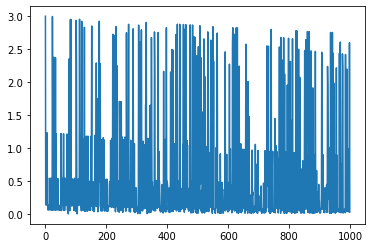

In [40]:
alpha=0.0002#learning rate
iters=1000 ###iterations
lamb=0.2
w_n,J_sgd = stochastic_gradient_descent(ztr,y,w.T,alpha, iters)

plt.plot(range(iters),J_sgd)
plt.show()

In [41]:
print(w_n)

[[0.06557465 0.06557465 0.06557465 0.06557465 0.06557465 0.06557465]
 [0.03282488 0.03282488 0.03282488 0.03282488 0.03282488 0.03282488]
 [0.037912   0.037912   0.037912   0.037912   0.037912   0.037912  ]
 [0.0217596  0.0217596  0.0217596  0.0217596  0.0217596  0.0217596 ]
 [0.02565183 0.02565183 0.02565183 0.02565183 0.02565183 0.02565183]
 [0.02221456 0.02221456 0.02221456 0.02221456 0.02221456 0.02221456]]


In [42]:
sgd=w_n[-1:]
print(sgd)

[[0.02221456 0.02221456 0.02221456 0.02221456 0.02221456 0.02221456]]


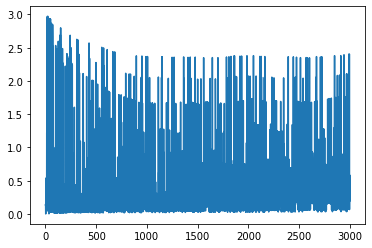

In [43]:
alpha=0.001
iters=3000 ###iterations
lamb=0.005
w_n_l1,J_sgd_l1 = stochastic_gradient_descent_l1(ztr,y,w,alpha, iters,lamb)

plt.plot(range(iters),J_sgd_l1)
plt.show()

In [44]:
print(w_n_l1)

[[0.22891475 0.22891475 0.22891475 0.22891475 0.22891475 0.22891475]
 [0.06718753 0.06718753 0.06718753 0.06718753 0.06718753 0.06718753]
 [0.10236949 0.10236949 0.10236949 0.10236949 0.10236949 0.10236949]
 [0.02847351 0.02847351 0.02847351 0.02847351 0.02847351 0.02847351]
 [0.0472459  0.0472459  0.0472459  0.0472459  0.0472459  0.0472459 ]
 [0.03467277 0.03467277 0.03467277 0.03467277 0.03467277 0.03467277]]


In [45]:
sgd_l1=w_n_l1[-1:]
print(sgd_l1)

[[0.03467277 0.03467277 0.03467277 0.03467277 0.03467277 0.03467277]]


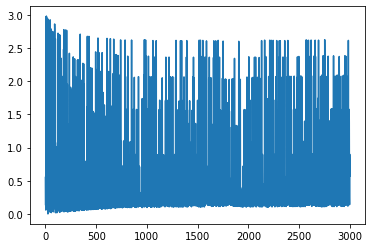

In [46]:
alpha=0.001 
iters=3000 ###iterations
lamb=1
w_n_l2,J_sgd_l2 = stochastic_gradient_descent_l2(ztr,y,w,alpha, iters,lamb)
plt.plot(range(iters),J_sgd_l2)
plt.show()

In [47]:
print(w_n_l2)

[[0.14310135 0.14310135 0.14310135 0.14310135 0.14310135 0.14310135]
 [0.05971401 0.05971401 0.05971401 0.05971401 0.05971401 0.05971401]
 [0.07555136 0.07555136 0.07555136 0.07555136 0.07555136 0.07555136]
 [0.03423445 0.03423445 0.03423445 0.03423445 0.03423445 0.03423445]
 [0.04522525 0.04522525 0.04522525 0.04522525 0.04522525 0.04522525]
 [0.03715684 0.03715684 0.03715684 0.03715684 0.03715684 0.03715684]]


In [48]:
sgd_l2=w_n_l2[-1:]
print(sgd_l2)

[[0.03715684 0.03715684 0.03715684 0.03715684 0.03715684 0.03715684]]


**MiniBatch Gradient Descent**

(55, 6)
(6,)


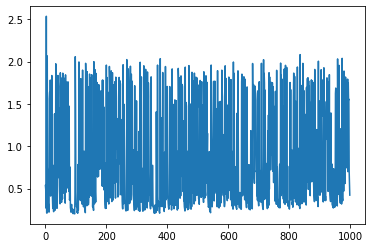

In [49]:
alpha=0.005
iters=1000 ##iterations
lamb=3
batch_size=25
print(ztr.shape)
print(w1.shape)
mb_w,J_mb = MB_gradient_descent(ztr,y,w1,alpha, iters, batch_size)

plt.plot(range(iters),J_mb)
plt.show()

In [50]:
print(mb_w)

[ 0.01800889  0.23203559  0.34295655 -0.13013481  0.0745416  -0.02518848]


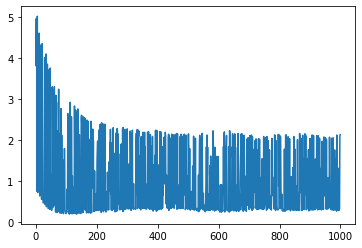

In [51]:
alpha=0.005 
iters=1000 
lamb=0.005
batch_size=30
mb_w_l1,J_mb_l1 = MB_gradient_descent_l1(ztr,y,w1,alpha, iters, batch_size,lamb)

plt.plot(range(iters),J_mb_l1)
plt.show()

In [52]:
print(mb_w_l1)

[[ 0.23105754]
 [ 0.04614605]
 [ 0.08808821]
 [-0.00482229]
 [ 0.02160498]
 [ 0.0003552 ]]


In [53]:
# alpha=0.001 
# iters=1000 ###iterations
# lamb=0.005
# batch_size=25
# print(w1.shape)
# print(ztr.shape)
# mb_w_l2,J_mb_l2 = MB_gradient_descent_l2(ztr,y,w1,alpha, iters, batch_size,lamb)

# plt.plot(range(iters),J_mb_l2)
# plt.show()

In [54]:
# print(mb_w_l2)

**Performance Measures for Regression**(Self Defined functions)


Have defined these functions but have not used them because sklearn libraries were allowed to be used which I have used to find the three errors.

Mean Absolute Error

In [55]:
def mean_abs_error(Ypre,Yact):
  sum_err=abs(Yact - Ypre)
  ma_err=sum_err/Ypre.shape[0]
  return ma_err

Mean Square Error

In [56]:
def mean_square_error(Ypre,Yact):
  sum_error=((Yact - Ypre)**2)
  ms_err=sum_error/Ypre.shape[0]
  return ms_err

Correlation Coefficient

In [57]:
def correlation_coeff(test_instances,Ypred,Yact):
  ypm=np.mean(Ypred)##mean of Ypred data
  yam=np.mean(Yact)##mean of Yactual data
  num=((Yact - yam)*(Ypred-ypm))
  d1=pow(((Yact - yam)**2),1/2)
  d2=pow(((Ypred - ypm)**2),1/2)
  c_c=num/(d1*d2)
  return c_c

Finding Errors

Using sklearn libraries(was allowed)

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import matthews_corrcoef

In [59]:
Xte1=Xte[:,0].reshape(Xte.shape[0],1)
Xte2=Xte[:,1].reshape(Xte.shape[0],1)
k=Xte.shape[0]
print(Xte2)
# print(Xte2.shape)

[[8.58]
 [9.08]
 [9.58]
 [8.08]
 [7.58]
 [8.58]
 [9.08]
 [9.58]
 [8.08]
 [7.58]]


In [60]:

# Xte1=np.append(Xte1,Xte1,axis=1)

# Xte1=np.append(Xte1,Xte2,axis=1)
Xte1=np.append(Xte,Xte1**2,axis=1)
Xte1=np.append(Xte,Xte2**2,axis=1)
Xte1=np.append(Xte,Xte1*Xte2,axis=1)
Xte1=np.append(np.ones([k,1]),Xte1,axis=1)
print(Xte1)

[[  1.        17.4        8.58     149.292     73.6164   631.628712]
 [  1.        17.86       9.08     162.1688    82.4464   748.613312]
 [  1.        18.3        9.58     175.314     91.7764   879.217912]
 [  1.        16.97       8.08     137.1176    65.2864   527.514112]
 [  1.        16.46       7.58     124.7668    57.4564   435.519512]
 [  1.        17.4        8.58     149.292     73.6164   631.628712]
 [  1.        17.85       9.08     162.078     82.4464   748.613312]
 [  1.        18.3        9.58     175.314     91.7764   879.217912]
 [  1.        16.9        8.08     136.552     65.2864   527.514112]
 [  1.        16.42       7.58     124.4636    57.4564   435.519512]]


In [61]:
Xte1.shape
print(Xte1)
print(bgd.T)

[[  1.        17.4        8.58     149.292     73.6164   631.628712]
 [  1.        17.86       9.08     162.1688    82.4464   748.613312]
 [  1.        18.3        9.58     175.314     91.7764   879.217912]
 [  1.        16.97       8.08     137.1176    65.2864   527.514112]
 [  1.        16.46       7.58     124.7668    57.4564   435.519512]
 [  1.        17.4        8.58     149.292     73.6164   631.628712]
 [  1.        17.85       9.08     162.078     82.4464   748.613312]
 [  1.        18.3        9.58     175.314     91.7764   879.217912]
 [  1.        16.9        8.08     136.552     65.2864   527.514112]
 [  1.        16.42       7.58     124.4636    57.4564   435.519512]]
[[0.12040141]
 [0.06170125]
 [0.06961951]
 [0.04162253]
 [0.04871827]
 [0.04190613]]


In [62]:
y_pred_bgd=Xte1.dot(bgd.T)
print(mean_squared_error(y_pred_bgd, Yte))
print(mean_absolute_error(y_pred_bgd, Yte))
# print(matthews_corrcoef(y_pred_bgd, Yte))


y_pred_bgd_l1=Xte1.dot(bgd_l1.T)
print(mean_squared_error(y_pred_bgd_l1, Yte))
print(mean_absolute_error(y_pred_bgd_l1, Yte))
# print(matthews_corrcoef(y_pred_bgd_l1, Yte))

y_pred_bgd_l2=Xte1.dot(bgd_l2.T)
print(mean_squared_error(y_pred_bgd_l2, Yte))
print(mean_absolute_error(y_pred_bgd_l2, Yte))
# print(matthews_corrcoef(y_pred_bgd_l2, Yte))

1451.208834920268
37.242967368074865
1475.7561322470854
37.55691224167781
1191.460677421232
33.740143694028866


Stochastic Gradient descent

In [63]:
y_pred_sgd=Xte1.dot(sgd.T)
print(mean_squared_error(y_pred_sgd, Yte))
print(mean_absolute_error(y_pred_sgd, Yte))
# print(matthews_corrcoef(y_pred_sgd, Yte))

y_pred_sgd_l1=Xte1.dot(sgd_l1.T)
print(mean_squared_error(y_pred_sgd_l1, Yte))
print(mean_absolute_error(y_pred_sgd_l1, Yte))
# print(matthews_corrcoef(y_pred_sgd_l1, Yte))

y_pred_sgd_l2=Xte1.dot(sgd_l2.T)
print(mean_squared_error(y_pred_sgd_l2, Yte))
print(mean_absolute_error(y_pred_sgd_l2, Yte))
# print(matthews_corrcoef(y_pred_sgd_l2, Yte))

359.48963297053274
18.491852086462014
921.53602271369
29.644654777000063
1064.669590639896
31.86843736823422
